In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('C:/Users/Rohan/Downloads/train.csv/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([1, 1, 9, ..., 1, 0, 1], dtype=int64)

In [17]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) -0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) -0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
w1, b1, w2, b2 = gradient_descent(X_train,Y_train,0.1,500)

Iteration:  0
[1 5 1 ... 5 5 5] [1 1 9 ... 1 0 1]
0.06014634146341463
Iteration:  10
[6 5 6 ... 5 5 5] [1 1 9 ... 1 0 1]
0.15904878048780488
Iteration:  20
[6 5 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.20778048780487804
Iteration:  30
[6 5 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.2399512195121951
Iteration:  40
[6 6 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.26809756097560977
Iteration:  50
[6 6 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.2988048780487805
Iteration:  60
[6 6 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.33439024390243904
Iteration:  70
[6 6 7 ... 0 0 5] [1 1 9 ... 1 0 1]
0.3798048780487805
Iteration:  80
[1 1 9 ... 0 0 5] [1 1 9 ... 1 0 1]
0.4307560975609756
Iteration:  90
[1 1 9 ... 0 0 5] [1 1 9 ... 1 0 1]
0.47029268292682924
Iteration:  100
[1 1 9 ... 0 0 1] [1 1 9 ... 1 0 1]
0.5014146341463415
Iteration:  110
[1 1 9 ... 1 0 1] [1 1 9 ... 1 0 1]
0.5300487804878049
Iteration:  120
[1 1 9 ... 1 0 1] [1 1 9 ... 1 0 1]
0.5560487804878049
Iteration:  130
[1 1 9 ... 1 0 1] [1 1 9 ... 1 0 1]
0.5815121951219512
Iteration: 

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


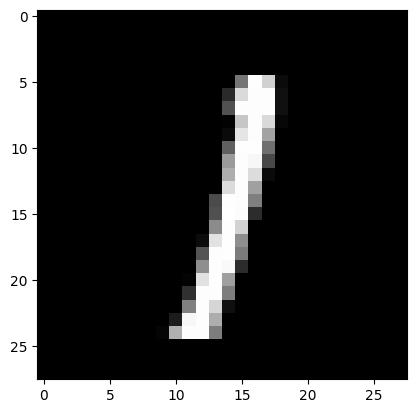

Prediction:  [1]
Label:  1


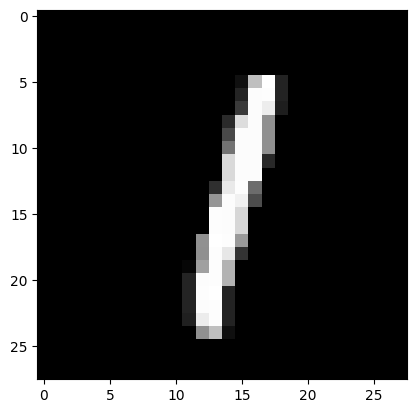

Prediction:  [9]
Label:  9


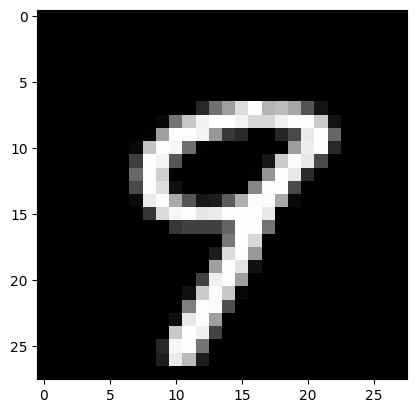

Prediction:  [9]
Label:  9


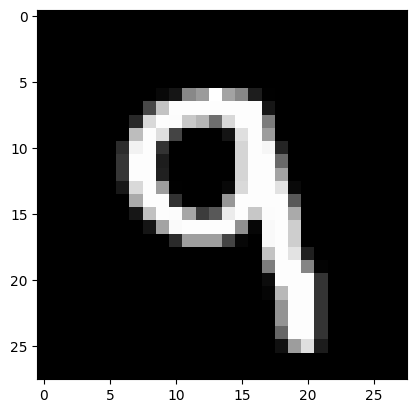

In [21]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [ ]:
#########################################

In [ ]:
#######################################################################

In [ ]:
# Using Sigmoid Function

In [9]:
def init_params(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2 / input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(Z):
    A = 1 / (1 + np.exp(-np.clip(Z, -500, 500)))
    return A, Z

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1, _ = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2, _ = sigmoid(Z2)
    caches = ((X, W1, b1, Z1, A1), (A1, W2, b2, Z2, A2))
    return A2, caches

def cost_function(A2, Y):
    """
    Compute the cost function for binary classification.

    Parameters:
        A2 (ndarray): Predicted output from the network.
        Y (ndarray): True labels.

    Returns:
        float: The cost value.
    """
    if Y.ndim == 1:
        Y = Y.reshape(1, -1)

    m = Y.shape[1]
    epsilon = 1e-10  # To avoid log(0)
    cost = (-1 / m) * np.sum(Y * np.log(A2 + epsilon) + (1 - Y) * np.log(1 - A2 + epsilon))
    return cost

def one_hot_encode(Y, num_classes):
    """
    Convert label array to one-hot encoding.

    Parameters:
        Y (ndarray): Label array of shape (number_of_samples,).
        num_classes (int): Number of classes.

    Returns:
        ndarray: One-hot encoded labels of shape (num_classes, number_of_samples).
    """
    m = Y.shape[0]
    one_hot = np.zeros((num_classes, m))
    one_hot[Y, np.arange(m)] = 1
    return one_hot

# Backward propagation
def backward_prop(caches, A2, Y):
    m = Y.shape[1]
    (X, W1, b1, Z1, A1), (A1, W2, b2, Z2, A2) = caches

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Training function
def train_model(X, Y, input_size=784, hidden_size=64, output_size=10, alpha=0.1, iterations=100):
    """
    Train a neural network using gradient descent.
    
    Parameters:
        X (ndarray): Input data.
        Y (ndarray): True labels (one-hot encoded).
        input_size (int): Number of input features.
        hidden_size (int): Number of neurons in the hidden layer.
        output_size (int): Number of output classes.
        alpha (float): Learning rate.
        iterations (int): Number of iterations.

    Returns:
        tuple: Trained weights and biases (W1, b1, W2, b2).
    """
    # Initialize parameters
    W1, b1, W2, b2 = init_params(input_size, hidden_size, output_size)

    for i in range(iterations):
        # Forward propagation
        A2, caches = forward_prop(W1, b1, W2, b2, X)

        # Compute cost
        cost = cost_function(A2, Y)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(caches, A2, Y)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print progress every 10 iterations
        if i % 100 == 0:
            predictions = np.argmax(A2, axis=0)
            accuracy = np.mean(predictions == np.argmax(Y, axis=0))
            print(f"Iteration {i}: Cost: {cost:.4f}, Accuracy: {accuracy * 100:.2f}%")

    return W1, b1, W2, b2

Y_train_one_hot = one_hot_encode(Y_train, num_classes=10)


In [10]:
W1, b1, W2, b2 = train_model(X_train, Y_train_one_hot, alpha=0.01, iterations=1000)

Iteration 0: Cost: 8.7470, Accuracy: 10.03%
Iteration 100: Cost: 3.1665, Accuracy: 31.45%
Iteration 200: Cost: 3.0445, Accuracy: 47.78%
Iteration 300: Cost: 2.9346, Accuracy: 57.40%
Iteration 400: Cost: 2.8279, Accuracy: 62.90%
Iteration 500: Cost: 2.7241, Accuracy: 66.28%
Iteration 600: Cost: 2.6234, Accuracy: 68.57%
Iteration 700: Cost: 2.5261, Accuracy: 70.40%
Iteration 800: Cost: 2.4327, Accuracy: 71.71%
Iteration 900: Cost: 2.3438, Accuracy: 72.86%


In [11]:
def make_predictions(X, W1, b1, W2, b2):
    """
    Perform forward propagation to make predictions.
    
    Parameters:
        X: Input data.
        W1, b1: First layer parameters.
        W2, b2: Second layer parameters.
    
    Returns:
        predictions (ndarray): Predicted labels.
    """
    A2, _ = forward_prop(W1, b1, W2, b2, X)  # Only A2 is needed
    predictions = np.argmax(A2, axis=0)  # Find the index of the max value (predicted class)
    return predictions
    
def test_prediction(index, W1, b1, W2, b2):
    """
    Test a specific prediction and visualize the input image.
    
    Parameters:
        index: Index of the training example to test.
        W1, b1, W2, b2: Neural network parameters.
    """
    current_image = X_train[:, index, None]  # Select the column corresponding to the index
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    
    label = Y_train[index] 
    
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    # Reshape the input for visualization
    current_image = current_image.reshape((28, 28)) 
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]} | Label: {label}")
    plt.axis('off')
    plt.show()



In [22]:
#Using ReLU
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 7 4 2 9 5 8 2 5 7 6 2 2 0 2 8 9 0 1 8 3 7 0 8 2 9 3 6 8 1 7 2 5 2 0 9 9
 6 3 9 7 2 1 5 6 6 2 7 4 1 5 7 2 1 4 3 1 4 1 1 7 8 8 7 2 7 1 1 0 3 3 9 4 2
 9 2 8 9 5 1 6 3 7 9 3 8 7 1 2 3 9 6 5 7 1 5 4 7 0 2 5 3 8 5 7 0 7 7 7 5 5
 7 4 7 2 9 3 2 3 6 7 0 6 2 0 3 1 5 3 4 1 9 7 0 6 8 0 8 8 7 5 1 6 1 6 0 5 0
 4 8 8 1 3 7 2 6 1 9 1 1 8 3 1 9 7 8 5 0 7 5 8 3 8 9 4 0 3 3 4 9 7 6 2 7 3
 5 2 3 3 3 1 2 7 0 6 2 6 5 0 7 4 3 7 3 5 8 6 1 0 0 0 9 8 6 9 0 1 4 4 1 2 1
 8 1 3 5 6 6 3 1 2 6 6 3 2 6 8 6 9 6 2 7 8 2 5 4 3 7 8 7 0 9 6 1 3 0 2 5 0
 0 5 9 3 6 2 1 3 2 0 2 0 7 4 9 8 4 9 9 9 9 7 9 8 6 6 1 2 9 7 2 9 1 7 1 0 4
 2 4 6 9 4 8 5 4 2 5 2 5 2 9 9 9 6 4 4 5 8 8 5 6 1 2 0 6 7 2 2 6 8 1 0 4 4
 4 6 5 3 2 1 2 9 1 4 1 2 5 2 9 4 5 2 0 2 4 3 4 6 6 7 0 3 0 9 0 9 7 1 4 0 5
 0 5 2 5 8 0 3 6 7 3 1 9 8 1 1 0 6 3 0 0 2 3 0 7 6 8 8 0 9 5 9 9 5 4 1 0 5
 7 6 4 4 8 1 4 8 4 2 6 0 4 1 0 3 1 4 7 2 8 2 3 8 7 0 2 3 5 9 6 6 9 3 2 3 9
 2 1 1 6 1 6 4 0 3 3 8 3 9 1 0 1 7 7 4 0 3 3 6 4 9 6 7 2 4 1 4 0 4 2 9 6 0
 4 1 4 0 2 6 9 5 4 0 6 7 

0.847

Prediction:  [6]
Label:  6


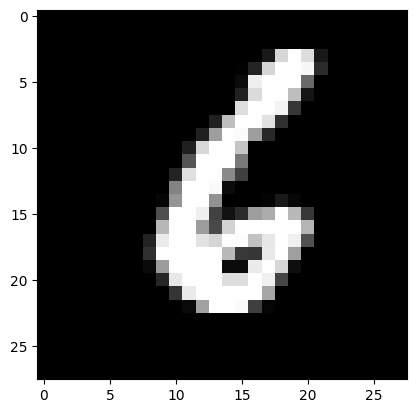

Prediction:  [1]
Label:  1


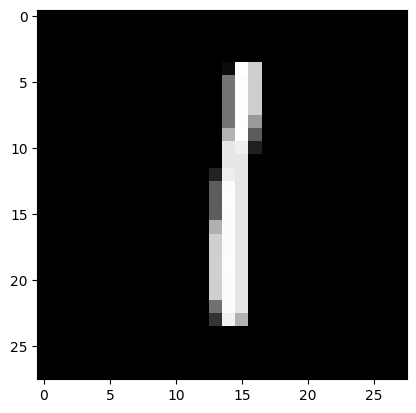

Prediction:  [6]
Label:  6


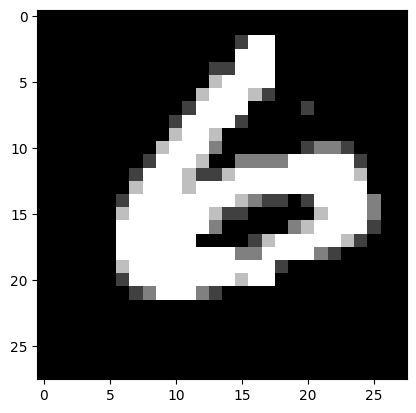

Prediction:  [9]
Label:  9


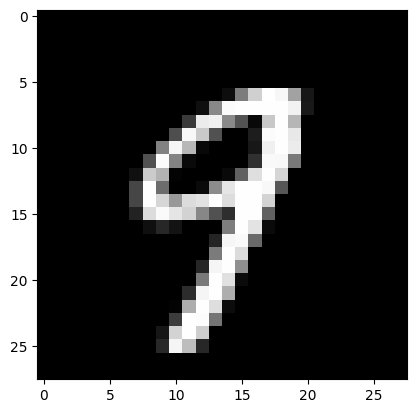

In [23]:
#Using ReLU
test_prediction(10, w1, b1, w2, b2)
test_prediction(13, w1, b1, w2, b2)
test_prediction(12, w1, b1, w2, b2)
test_prediction(11, w1, b1, w2, b2)

In [14]:
#Using Sigmoid
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 7 9 2 4 3 3 1 0 7 6 2 2 0 2 8 7 0 1 8 3 7 0 8 2 7 3 0 8 1 5 2 6 2 0 9 1
 6 3 4 7 2 1 5 0 6 2 7 4 1 1 7 2 1 9 3 1 4 1 1 7 1 2 7 2 7 2 1 0 2 3 9 4 2
 2 2 8 9 3 1 6 3 7 4 3 3 7 1 2 3 7 6 7 7 1 7 4 2 0 2 5 3 3 4 7 0 7 7 7 5 5
 7 4 7 2 9 3 2 3 1 7 0 6 2 0 2 1 0 3 4 1 7 0 0 6 9 0 8 1 1 5 1 1 1 4 0 1 0
 4 1 7 1 3 7 2 6 1 9 1 1 8 3 1 9 7 8 3 0 7 3 1 3 4 1 4 0 3 3 4 4 7 6 1 7 3
 3 2 1 3 3 1 2 7 0 1 2 2 5 3 7 4 9 7 3 1 3 6 1 0 0 0 9 0 6 9 0 1 4 1 1 2 1
 8 1 3 3 6 6 3 1 2 6 6 3 2 6 8 6 7 6 2 7 8 2 3 4 3 7 8 7 0 7 6 1 3 0 2 0 1
 0 0 1 3 6 2 1 3 2 0 2 0 7 4 9 3 4 9 9 4 9 7 9 8 6 1 1 2 4 7 2 7 1 7 1 0 4
 2 4 6 9 4 8 6 4 2 5 2 0 2 9 9 9 0 4 4 5 3 8 3 6 2 2 0 6 7 2 2 6 8 2 0 1 7
 9 0 3 3 2 1 2 9 1 4 4 2 1 2 9 4 1 2 0 2 4 3 4 6 6 7 0 3 0 7 0 4 7 1 4 0 0
 0 5 2 5 9 7 3 1 7 3 1 9 1 1 1 0 6 3 0 0 2 3 0 7 6 3 8 0 9 3 7 4 5 9 1 0 0
 7 6 4 4 3 1 4 1 4 2 6 0 4 1 0 3 1 4 7 2 8 2 3 8 7 9 2 3 3 7 6 1 9 3 3 3 7
 2 1 1 6 1 6 9 0 3 3 2 3 9 1 0 1 7 7 4 0 3 3 6 4 4 1 7 4 4 1 4 0 4 2 4 6 0
 9 7 1 0 2 6 7 3 4 0 0 7 

0.738

Prediction:  6
Label:  6


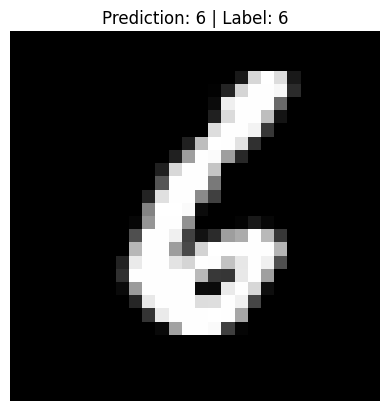

Prediction:  1
Label:  1


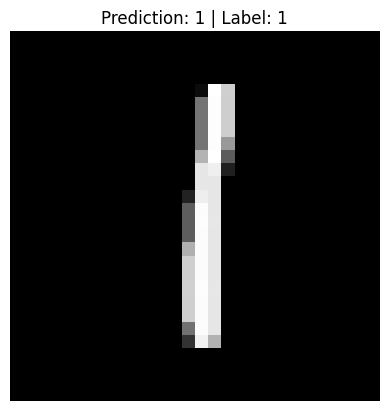

Prediction:  6
Label:  6


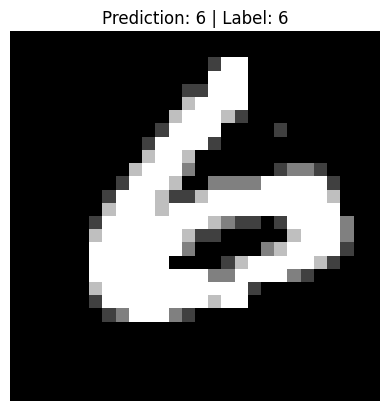

Prediction:  9
Label:  9


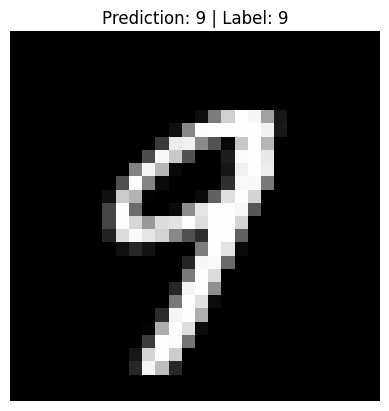

In [16]:
#Using Sigmoid
test_prediction(10, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)